## LSTM Example

We want to train an univariate, one feature LSTM

**0) Loading Libraries and Subroutines**

Standard libraries for plotting and numerical operations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
GRAPE_df = pd.read_pickle('pkl_data/GRAPE.pkl')
UW_df = pd.read_pickle('pkl_data/UW.pkl')

In [116]:
grows_not_nan = GRAPE_df[GRAPE_df.iloc[:,3].notna()]
print(grows_not_nan.shape)

(163, 9)


In [164]:
rows_not_nan = UW_df[UW_df.iloc[:,8].notna()]
print(rows_not_nan.shape)

(509, 19)


In [167]:
UW_df_usable = UW_df[~UW_df[9].isna()].copy()
dropped_cols = list(range(10,20))
UW_df_usable = UW_df_usable.drop(columns = dropped_cols)
UW_df_usable.tail()

Visit Number,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
983-OD,"[19, 15, 17, 9, 15, 26, 25, 24, 25, 25, 13, 26...","[22, 18, 18, 15, 21, 25, 23, 22, 25, 25, 15, 2...","[7, 8, 6, 12, 10, 24, 18, 16, 23, 20, 15, 26, ...","[20, 20, 24, 23, 22, 27, 28, 26, 27, 27, 24, 2...","[9, 15, 18, 13, 3, 25, 25, 23, 25, 23, 15, 25,...","[25, 23, 24, 25, 19, 28, 25, 27, 27, 29, 17, 2...","[21, 21, 17, 12, -1, 31, 28, 26, 28, 27, 8, 28...","[15, 5, 9, 17, 15, 28, 10, 12, 25, 19, 9, 20, ...","[21, 15, 21, 22, 12, 21, 23, 24, 24, 25, 11, 2..."
983-OS,"[20, 10, 7, 9, 23, 20, 22, 19, 21, 20, 16, 22,...","[16, 13, 18, 17, 17, 17, 21, 24, 25, 25, 19, 2...","[20, 16, 19, 18, 19, 25, 17, 22, 23, 19, 11, 2...","[14, 7, 10, 16, 11, 21, 13, 27, 24, 21, 4, 28,...","[13, -1, 6, 16, 17, 17, 20, 18, 20, 18, 12, 25...","[12, 13, 14, 20, 17, 21, 22, 22, 26, 22, 13, 2...","[19, 12, 15, 17, 15, 17, 17, 22, 25, 25, 13, 2...","[8, 14, 9, 12, 11, 18, 18, 16, 17, 10, 11, 21,...","[12, 7, 17, 16, 12, 18, 15, 19, 22, 18, -1, 15..."
986-OD,"[34, 35, 35, 29, 35, 33, 35, 34, 32, 29, 35, 3...","[27, 27, 22, 21, 28, 30, 29, 28, 30, 28, 30, 2...","[31, 27, 26, 29, 29, 32, 30, 33, 33, 33, 33, 3...","[31, 31, 27, 27, 28, 29, 31, 33, 31, 30, 30, 3...","[31, 31, 33, 29, 34, 32, 32, 28, 32, 29, 31, 3...","[28, 30, 27, 28, 30, 32, 30, 31, 31, 25, 30, 3...","[29, 29, 30, 27, 31, 32, 29, 29, 29, 30, 31, 3...","[28, 28, 29, 29, 29, 30, 31, 30, 31, 32, 30, 3...","[31, 30, 29, 24, 32, 32, 31, 29, 30, 29, 30, 3..."
986-OS,"[34, 29, 30, 35, 35, 33, 35, 35, 35, 35, 34, 3...","[25, 22, 21, 12, 30, 29, 26, 27, 25, 22, 26, 2...","[28, 30, 30, 27, 35, 31, 33, 29, 31, 35, 29, 3...","[26, 29, 27, 24, 25, 29, 28, 25, 23, 28, 32, 2...","[30, 26, 31, 27, 30, 31, 31, 31, 31, 28, 30, 3...","[28, 30, 27, 27, 30, 30, 30, 31, 30, 30, 31, 3...","[30, 30, 28, 29, 29, 32, 31, 31, 30, 35, 31, 3...","[30, 27, 28, 30, 28, 31, 30, 32, 31, 28, 29, 3...","[35, 33, 29, 30, 32, 31, 32, 31, 31, 30, 31, 3..."
991-OD,"[30, 29, 28, 29, 28, 31, 30, 32, 31, 28, 28, 3...","[28, 31, 28, 27, 31, 31, 31, 29, 31, 29, 29, 3...","[29, 32, 28, 30, 31, 31, 32, 32, 31, 31, 31, 3...","[31, 30, 30, 30, 33, 32, 33, 31, 33, 33, 33, 3...","[25, 29, 26, 26, 28, 29, 30, 28, 28, 28, 34, 2...","[29, 31, 32, 33, 29, 33, 32, 31, 30, 35, 31, 3...","[25, 26, 25, 28, 29, 32, 30, 30, 26, 29, 30, 3...","[32, 28, 26, 26, 34, 32, 33, 32, 31, 31, 31, 3...","[26, 26, 24, 22, 27, 29, 27, 27, 30, 26, 28, 3..."


In [35]:
UW_df_fill.head()

Visit Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,,,,,,,,,,,,,,,,,,,
1-OD,"[10, 9, -1, 10, 21, 24, 21, 18, 20, 19, 17, 23...","[19, 20, 22, 20, 19, 24, 22, 24, 25, 23, 17, 2...","[15, 23, 20, 21, 26, 24, 26, 28, 26, 25, 19, 2...","[13, 16, 11, 6, 5, 22, 24, 20, 23, 23, 18, 23,...","[21, 19, 19, 14, 19, 24, 23, 17, 21, 22, 17, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2...","[23, 21, 18, 20, 23, 26, 24, 22, 24, 22, 18, 2..."
1-OS,"[-1, 17, -1, -1, 19, 23, 18, 18, 25, 20, 18, 2...","[11, -1, 8, -1, 10, 17, 20, 19, 21, 25, 16, 22...","[11, 9, -1, 10, 22, 23, 21, 10, 23, 18, 19, 24...","[7, -1, 3, -1, 15, 21, 14, 15, 18, 15, 15, 22,...","[9, 10, -1, 16, 19, 22, 23, 18, 23, 21, 11, 24...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2...","[16, 17, 16, 20, 17, 16, 21, 21, 23, 24, 21, 2..."
1000-OD,"[23, 23, 23, 20, 25, 26, 24, 19, 22, 16, 25, 2...","[27, 26, 21, 24, 28, 28, 25, 21, 21, 21, 28, 2...","[23, 18, 17, 21, 24, 26, 24, 21, 20, 19, 23, 2...","[19, 20, 16, 22, 29, 24, 26, 24, 13, 10, 22, 2...","[21, 13, 10, 15, 23, 21, 14, 17, 16, 15, 5, 21...","[12, 14, 8, 10, 11, 16, 16, 11, 16, 11, 12, 12...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18...","[2, 4, 5, 9, 2, 13, 19, 13, 13, 13, 13, 17, 18..."
1000-OS,"[16, 21, 15, 16, 19, 11, -1, 19, 6, 17, 19, 23...","[4, 22, 21, 20, 1, 11, 18, 20, 24, 21, 12, 24,...","[-1, 5, 15, 18, 11, 23, 18, 21, 15, 15, 20, 25...","[18, 17, 13, -1, 9, 12, 15, 8, 19, 18, 11, 17,...","[-1, 15, 21, 12, 13, 6, 8, 7, 16, 22, 16, 26, ...","[14, 13, 16, 9, 15, 20, 14, -1, 16, 18, 13, 21...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20, 18...","[3, 13, 7, 7, -1, 11, 5, 7, 16, 16, 12, 20

In [29]:
#fill forward - replace NaNs with previous visits data
GRAPE_df_fill = GRAPE_df.fillna(method='ffill', axis=1)
UW_df_fill = UW_df.fillna(method='ffill', axis=1)

/tmp/ipykernel_32266/2976799229.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  GRAPE_df_fill = GRAPE_df.fillna(method='ffill', axis=1)
/tmp/ipykernel_32266/2976799229.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  UW_df_fill = UW_df.fillna(method='ffill', axis=1)


In [39]:
print(len(GRAPE_df_fill[1][1]))
print(len(UW_df_fill[1][1]))

60
54


/tmp/ipykernel_32266/2018451108.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(GRAPE_df_fill[1][1]))
/tmp/ipykernel_32266/2018451108.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(UW_df_fill[1][1]))


In [43]:
UW_df_fill[1][1][1]

/tmp/ipykernel_32266/3748267595.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  UW_df_fill[1][1][1]


17

In [42]:
print(len(GRAPE_df_fill[1]))
print(len(UW_df_fill[1][1]))

263
54


/tmp/ipykernel_32266/3942610778.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(UW_df_fill[1][1]))


In [41]:
UW_df_fill.shape

(7428, 19)

Loading LSTM related keras libraries: -1 becomes 0 in UW

In [58]:
from keras import optimizers
from keras.layers import LSTM
from keras.layers import Dense, Masking, TimeDistributed, Reshape
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

Calling a subroutine that puts data set in the correct shape for LSTM (see later)

In [18]:
from prepare_data import prepare_data

<br>

**1) Generating a Simple Dataset**

**2) Preprocessing the Data**

In [168]:
#need to convert to 3d array: patients x visits x features, where features is 54 sens vals

patients = UW_df_usable.shape[0]
visits = UW_df_usable.shape[1]
features = len(UW_df_usable.iloc[0, 0])
UW_3d = np.zeros((patients, visits, features), dtype= float)
for patient in range(patients):
    for visit in range(visits):
        feature_list = UW_df_usable.iloc[patient, visit]
        for feature in range(features):
            UW_3d[patient, visit, feature] = feature_list[feature]
print(UW_3d.shape)

(509, 9, 54)


2a) Scaling:

In [169]:
#flatten out to scale, replace -1 w/ NaN so its ignored in scaling
UW_flat = UW_3d.reshape(-1, features)
UW_flat_zero = np.where(UW_flat == -1, 0, UW_flat)

scaler  = MinMaxScaler(feature_range = (0, 1))
UW_scaled_flat = scaler.fit_transform(UW_flat_zero)
UW_scaled = UW_scaled_flat.reshape(patients, visits, features)
print(UW_scaled.shape)

(509, 9, 54)


2b) Reshaping the Data

The dataset has only one feature. We want to predict *dt_futu* data points into the future and train the LSTM with the previous *dt_past* time steps to predict the next. For that purpose, we need to reshape the data in such a way that *dt_futu* is interpreted as features. Therefore, we run the following subroutine:<br>
<br>

In [170]:
patient_indices = np.arange(patients)
np.random.seed(42)
np.random.shuffle(patient_indices)
train_split = int(np.round(0.7 * patients))

train_indices = patient_indices[:train_split]
test_indices = patient_indices[train_split:]

In [193]:
#past + fture <= 19
#patient - level splitting. indiv patient data not in both test / train
dt_past    = 7
dt_futu    = 2
#predict 2 steps in future, need patients with at least 6 vistist = 1436
n_features = 54
Xs_train, Xs_test = [], []
Ys_train, Ys_test = [], []

for p_idx in train_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_train.append(X)
    Ys_train.append(Y)

for p_idx in test_indices:
    [X, Y] = prepare_data(UW_scaled[p_idx], dt_past, dt_futu)
    Xs_test.append(X)
    Ys_test.append(Y)


X_Train = np.vstack(Xs_train)
Y_Train = np.vstack(Ys_train)
X_Test = np.vstack(Xs_test)
Y_Test = np.vstack(Ys_test)

print(X_Train.shape, Y_Train.shape)
print(X_Test.shape, Y_Test.shape)

(356, 7, 54) (356, 2, 54)
(153, 7, 54) (153, 2, 54)


<br>

Let us check the shapes:

In order to train the LSTM with $dt_{futu}$ and $dt_{past}$, we need the first $dt_{past}$ steps in order to train for the next prediction. The length of the period we want to predict is $dt_{futu}$. The last step in the training will be the point, when we predict the last sequence $dt_{futu}$ with the previous steps $dt_{past}$. Thus, the training data set has the length $len\left(Y_{tnorm}\right) - dt_{past} - dt_{futu} + 1$. Each time point in the past we need for the prediction will have its own influence on the future and therefore are regarded as feature. Thus, $X$ has to have the shape $\left[len\left(Y_{tnorm}\right) - dt_{past} - dt_{futu} + 1\right] \times dt_{past}$.<br>   
Because of that interpretation, each feature is shifted by one time point:

<br>

Following the same logic, in order to train the LSTM to predict the future $dt_{futu}$ ahead, $Y$ needs to have the same structure: 

<br>

2c) Splitting data into Training and Test dataset

Just to make sure, that the shape is *len(X) x dt_past x n_features*

<br>

**3) Creating the Model**

Creating a LSTM in Python follows the same syntax as for CNNs. We want to predict data points in the future, based on previous data points. Therefore, we need to solve a **regression** problem:<br>

In [194]:
n_neurons  = 128
batch_size = 64

model = Sequential()
model.add(LSTM(n_neurons, input_shape = (dt_past, n_features), activation = 'tanh', return_sequences = False))
model.add(Dense(dt_futu * n_features))
model.add(Reshape((dt_futu, n_features)))

opt = optimizers.Adam()
model.compile(loss = 'mean_squared_error', optimizer = opt)

model.summary()

/home/christianf/miniconda3/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 128)            │        93,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 108)            │        13,932 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 2, 54)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,628 (420.42 KB)

 Trainable params: 107,628 (420.42 KB)

 Non-trainable params: 0 (0.00 B)

<br>

**4) Running the Fit**

In [195]:
n_epochs = 75
out = model.fit(X_Train, Y_Train, epochs = n_epochs, batch_size = batch_size, validation_data= (X_Test, Y_Test), verbose = 2, shuffle = True)

Epoch 1/75
6/6 - 2s - 322ms/step - loss: 0.4217 - val_loss: 0.2113
Epoch 2/75
6/6 - 0s - 21ms/step - loss: 0.1401 - val_loss: 0.0753
Epoch 3/75
6/6 - 0s - 20ms/step - loss: 0.0610 - val_loss: 0.0466
Epoch 4/75
6/6 - 0s - 21ms/step - loss: 0.0495 - val_loss: 0.0449
Epoch 5/75
6/6 - 0s - 63ms/step - loss: 0.0457 - val_loss: 0.0387
Epoch 6/75
6/6 - 0s - 25ms/step - loss: 0.0398 - val_loss: 0.0353
Epoch 7/75
6/6 - 0s - 21ms/step - loss: 0.0371 - val_loss: 0.0335
Epoch 8/75
6/6 - 0s - 20ms/step - loss: 0.0352 - val_loss: 0.0318
Epoch 9/75
6/6 - 0s - 21ms/step - loss: 0.0339 - val_loss: 0.0306
Epoch 10/75
6/6 - 0s - 21ms/step - loss: 0.0329 - val_loss: 0.0296
Epoch 11/75
6/6 - 0s - 20ms/step - loss: 0.0322 - val_loss: 0.0288
Epoch 12/75
6/6 - 0s - 21ms/step - loss: 0.0312 - val_loss: 0.0285
Epoch 13/75
6/6 - 0s - 21ms/step - loss: 0.0307 - val_loss: 0.0275
Epoch 14/75
6/6 - 0s - 21ms/step - loss: 0.0300 - val_loss: 0.0271
Epoch 15/75
6/6 - 0s - 20ms/step - loss: 0.0294 - val_loss: 0.0266
Epo

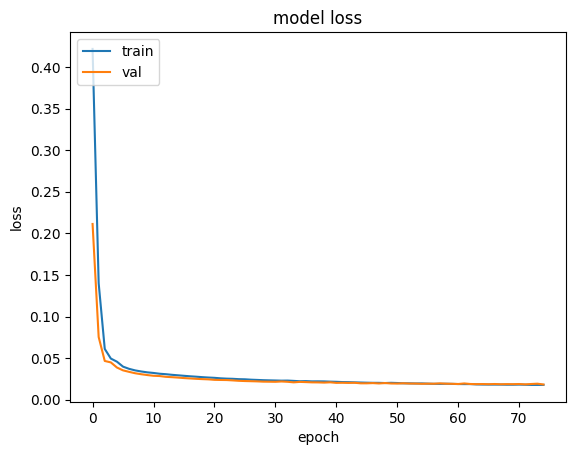

In [196]:
#plotting #############################################################
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.savefig('training loss.pdf')
plt.show()
#######################################################################

<br>

**5) Evaluating the Fit**

In [197]:
test_id = '1048-OD'
test_pat = UW_df.index.get_loc(test_id)
#print(UW_scaled[test_pat][4:6]) same as below
X_pat, Y_pat = prepare_data(UW_scaled[test_pat], dt_past, dt_futu)

In [176]:
print(Y_pat)

[[[0.62857143 0.68571429 0.45714286 0.         0.68571429 0.54285714
   0.74285714 0.74285714 0.         0.         0.77142857 0.71428571
   0.68571429 0.68571429 0.08571429 0.         0.         0.
   0.4        0.65714286 0.77142857 0.85714286 0.88571429 0.71428571
   0.17142857 0.         0.4        0.         0.71428571 0.8
   0.82857143 0.88571429 0.85714286 0.8        0.         0.34285714
   0.77142857 0.74285714 0.71428571 0.74285714 0.65714286 0.
   0.25714286 0.6        0.77142857 0.62857143 0.68571429 0.68571429
   0.37142857 0.65714286 0.74285714 0.65714286 0.54285714 0.68571429]]]


In [177]:
print(PredY_pat)

[[[0.3330433  0.39770475 0.2795306  0.28205642 0.3701301  0.39761448
   0.30120027 0.31325448 0.35849473 0.24117129 0.24182373 0.35194683
   0.3335755  0.12628055 0.08283683 0.19276363 0.2315939  0.29216474
   0.1861075  0.27286834 0.2582611  0.2506699  0.10338666 0.19373733
   0.04804986 0.24217504 0.44051248 0.5072741  0.6827327  0.7582585
   0.8992692  0.79843473 0.92181754 0.79851097 0.08392879 0.53662324
   0.6215365  0.7153989  0.69938934 0.7562382  0.67004913 0.68646806
   0.5427012  0.4617069  0.5132673  0.5482558  0.44891015 0.4788232
   0.54086864 0.4174287  0.43772376 0.36231816 0.31164172 0.3163197 ]
  [0.33002958 0.3208061  0.24852267 0.27182737 0.25315374 0.40634042
   0.34370518 0.27535027 0.40563884 0.33308133 0.18012501 0.29591668
   0.2835324  0.199135   0.09307056 0.1866603  0.35969156 0.32502258
   0.14673798 0.27084148 0.26346296 0.19912903 0.10199586 0.12532854
   0.1036978  0.20178528 0.4319371  0.39269873 0.5487287  0.7422939
   0.87937146 0.8693714  0.7910394  

In [198]:
pred = model.predict(X_pat)
actual = Y_pat



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


In [199]:
pred = np.array(pred)
actual = np.array(actual)
flat_pred = pred.reshape(-1, 54)
flat_actual = actual.reshape(-1, 54)
pred_unscaled = scaler.inverse_transform(flat_pred)
actual_unscaled = scaler.inverse_transform(flat_actual)
print(flat_pred.shape)
print(flat_actual.shape)

(2, 54)
(2, 54)


In [180]:
print(flat_pred)

[[ 0.5007527   0.48406288  0.18254624  0.08706696  0.6144199   0.56777763
   0.56553614  0.26737395 -0.00394183  0.00518626  0.5647677   0.6861216
   0.68436235  0.66214913  0.23192571  0.1339852   0.04229676  0.13690929
   0.3961898   0.5671123   0.6933468   0.7941073   0.7140804   0.46034455
   0.32949108  0.15362312  0.20804319  0.35113272  0.68608314  0.78876734
   0.8239656   0.7132067   0.5979733   0.5528337  -0.06887548  0.31162342
   0.63044894  0.8225769   0.8359962   0.6607839   0.5748889   0.3898152
   0.3391726   0.33658388  0.6207101   0.6914868   0.7215884   0.50593054
   0.24842907  0.4028406   0.74013084  0.5959736   0.37664202  0.42850348]]


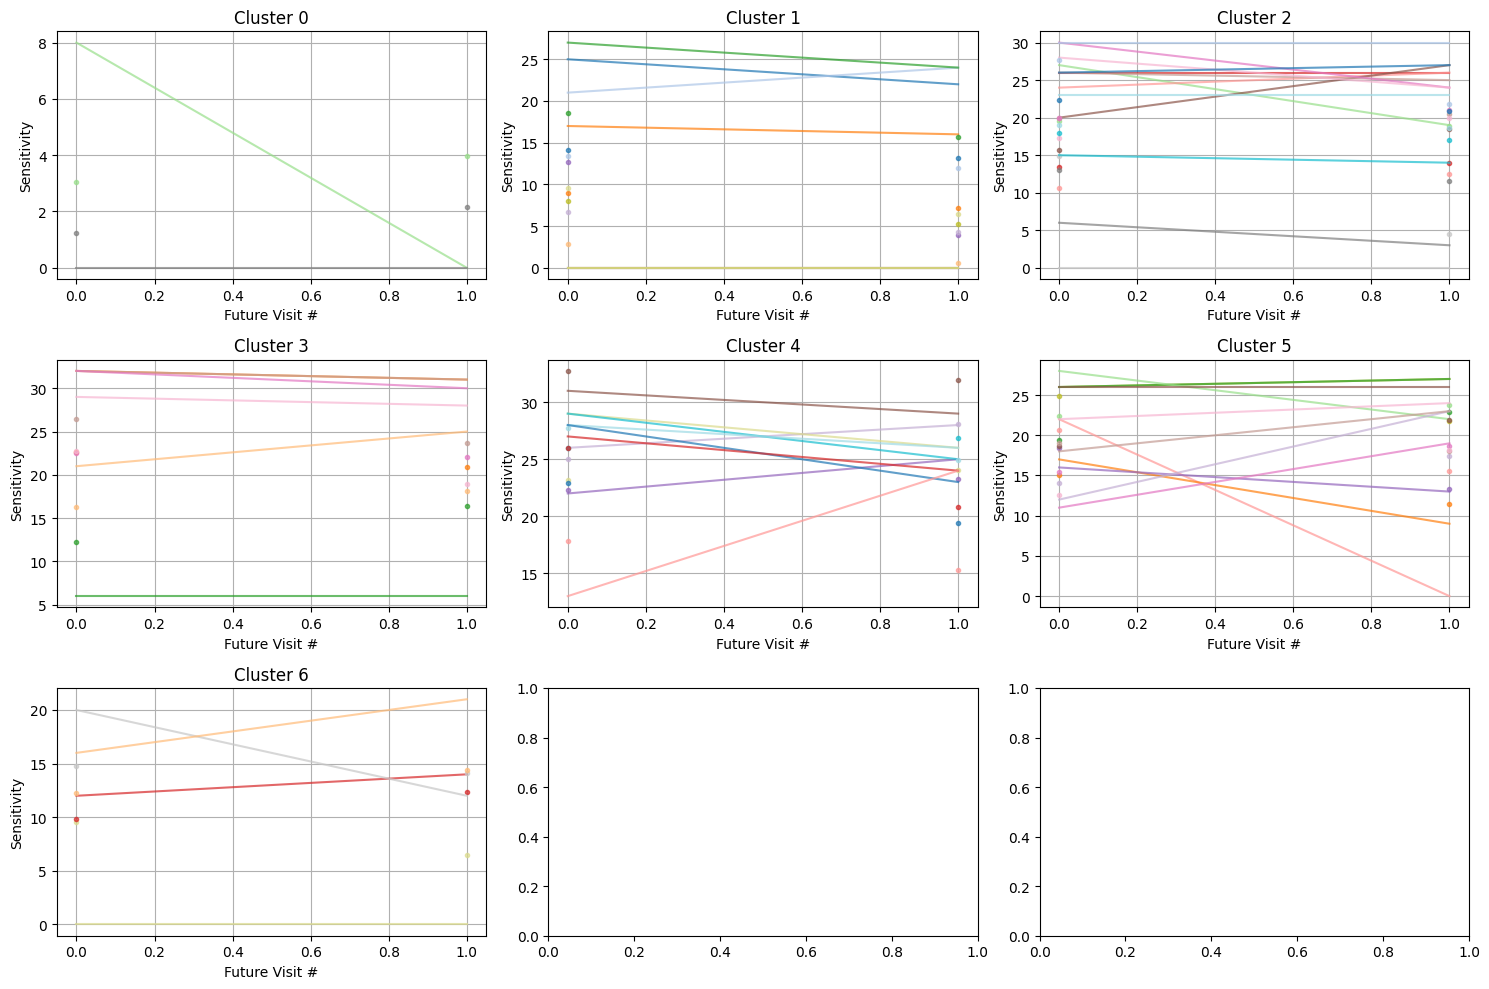

In [201]:
cluster_indices = {
    0: [25, 34],
    1: [0,1,2,3,4,8,9,16,17],
    2: [5,6,7,10,11,12,13,14,15,18,19,20,21],
    3: [22,23,24,31,32,33],
    4: [28,29,30,37,38,39,40,46,47],
    5: [27,36,42,44,45,48,49,50,51,52,53],
    6: [17,26,35,43]
}
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, features in enumerate(cluster_indices.values()):
    ax = axes[i]
    for f in features:
        color = plt.cm.tab20(f % 20)
        ax.plot(actual_unscaled[:, f], '-', color = color, alpha=0.7)
        ax.plot(pred_unscaled[:, f], '.', color = color, alpha=0.7)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Future Visit #')
    ax.set_ylabel('Sensitivity')
    ax.grid(True)

plt.tight_layout()
plt.show()

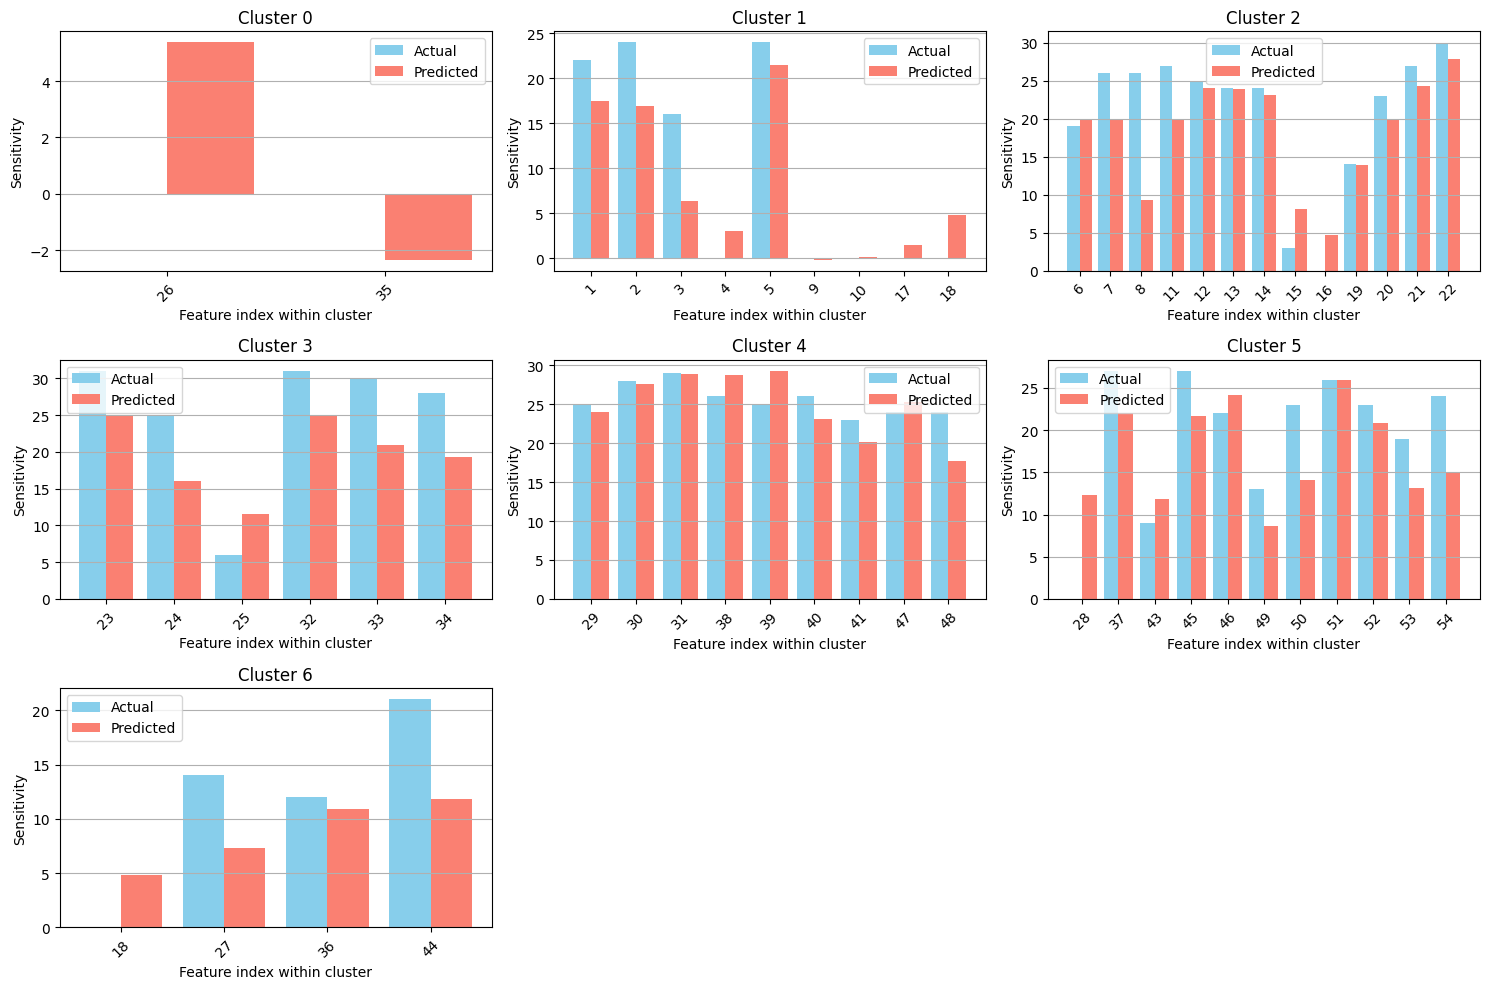

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# actual_unscaled and pred_unscaled shape: (1, n_features) or (n_features,)
actual_vals = actual_unscaled.flatten()  # shape (n_features,)
pred_vals   = pred_unscaled.flatten()    # shape (n_features,)

cluster_indices = {
    0: [25, 34],
    1: [0,1,2,3,4,8,9,16,17],
    2: [5,6,7,10,11,12,13,14,15,18,19,20,21],
    3: [22,23,24,31,32,33],
    4: [28,29,30,37,38,39,40,46,47],
    5: [27,36,42,44,45,48,49,50,51,52,53],
    6: [17,26,35,43]
}

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, features in enumerate(cluster_indices.values()):
    ax = axes[i]
    
    actual_cluster = actual_vals[features]
    pred_cluster   = pred_vals[features]
    
    x = np.arange(len(features))
    
    ax.bar(x - 0.2, actual_cluster, width=0.4, label='Actual', color='skyblue')
    ax.bar(x + 0.2, pred_cluster, width=0.4, label='Predicted', color='salmon')
    
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Feature index within cluster')
    ax.set_ylabel('Sensitivity')
    ax.set_xticks(x)
    ax.set_xticklabels([str(f+1) for f in features], rotation=45)
    ax.legend()
    ax.grid(True, axis='y')

# Remove any empty subplots
for j in range(len(cluster_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

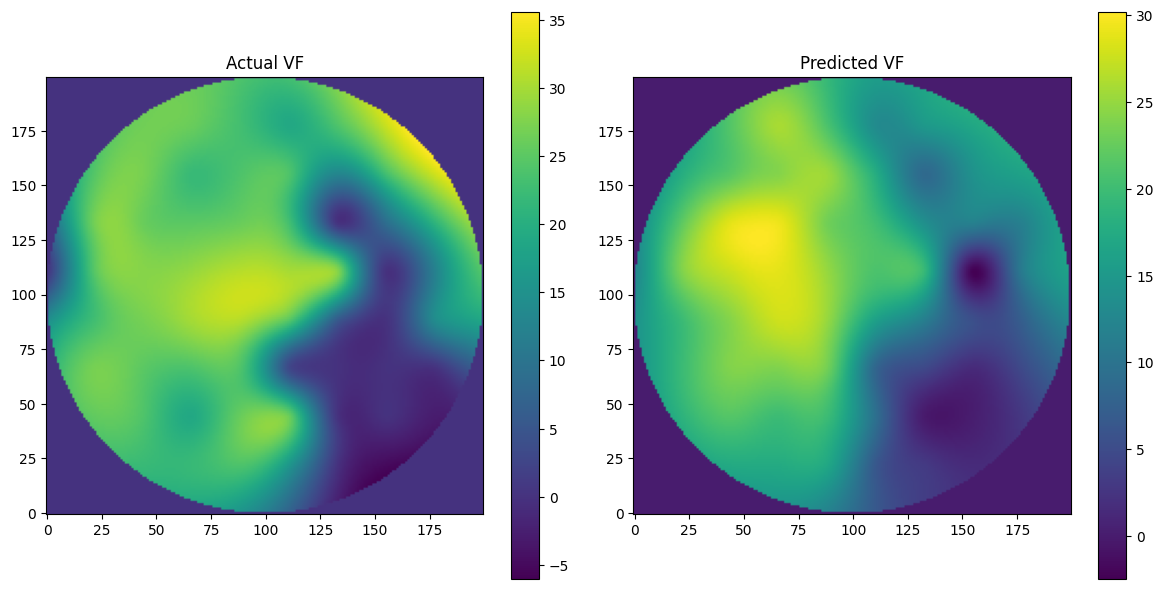

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import pandas as pd

# Flatten actual/predicted
actual_vf = actual_unscaled.flatten()  # shape (54,)
pred_vf   = pred_unscaled.flatten()    # shape (54,)

# Coordinates
coordinates_df = pd.read_csv("data/UW_coords.csv")
all_coords = np.array([(coordinates_df["X"][i], -coordinates_df["Y"][i]) 
                       for i in range(len(coordinates_df))])

# Grid for interpolation
radius = 27
grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
mask = (np.sqrt(grid_x**2 + grid_y**2) <= radius)
mask_float = mask.astype(np.float32)

# Interpolation function
def vf_to_image(vf_values, coords, grid_x, grid_y, mask):
    rbf = Rbf(coords[:,0], coords[:,1], vf_values, function='thin_plate')
    grid_z = rbf(grid_x, grid_y)
    masked_grid = np.where(mask, grid_z, np.nan)
    values = np.nan_to_num(masked_grid, nan=0.0)
    img = np.stack([values.T, mask_float], axis=-1)  # shape (200,200,2)
    return img, values.T

# Generate images
img_actual, values_actual = vf_to_image(actual_vf, all_coords, grid_x, grid_y, mask)
img_pred, values_pred     = vf_to_image(pred_vf, all_coords, grid_x, grid_y, mask)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6))
im0 = axes[0].imshow(values_actual, origin='lower', cmap='viridis')
axes[0].set_title('Actual VF')
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(values_pred, origin='lower', cmap='viridis')
axes[1].set_title('Predicted VF')
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

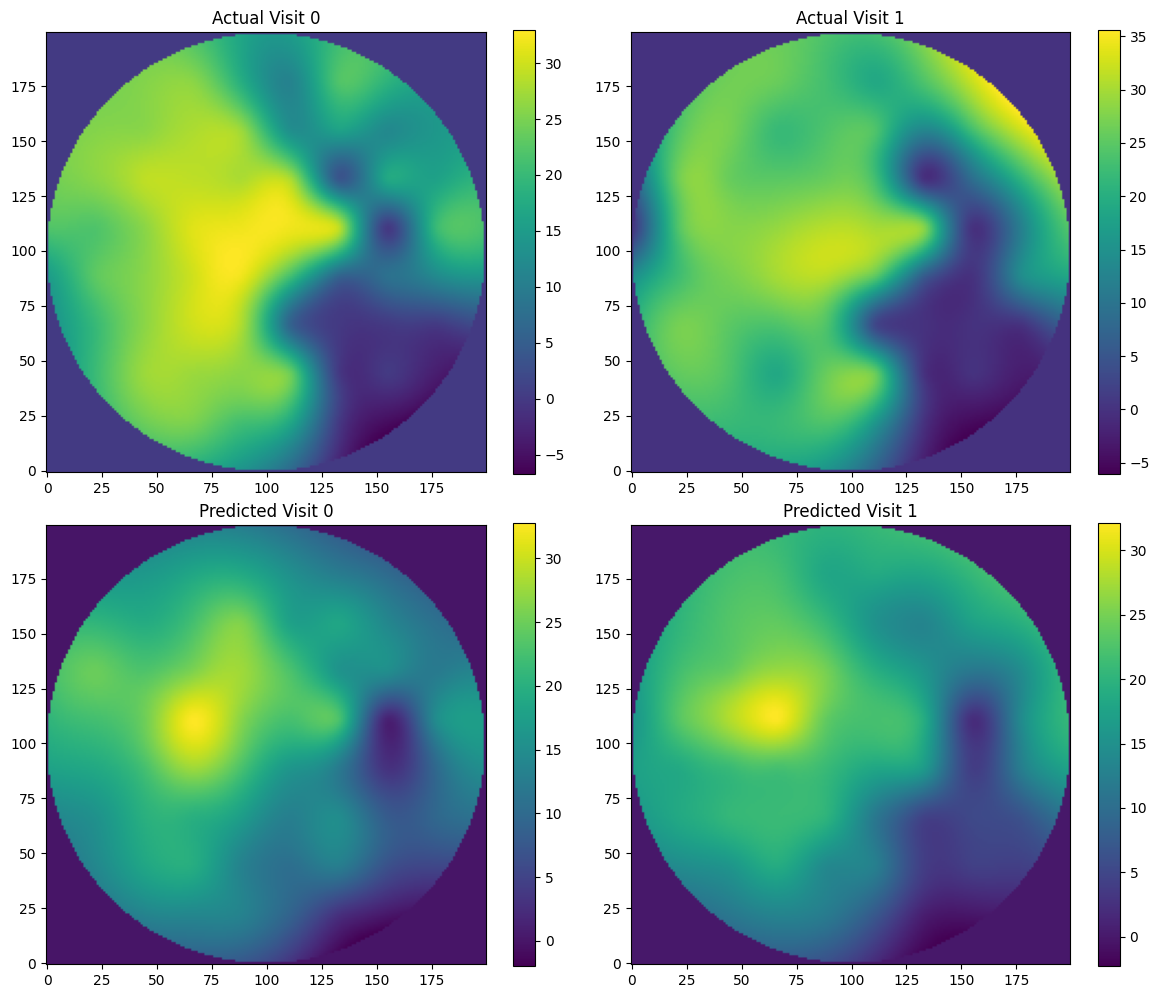

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import pandas as pd

# Coordinates
coordinates_df = pd.read_csv("data/UW_coords.csv")
all_coords = np.array([(coordinates_df["X"][i], -coordinates_df["Y"][i]) 
                       for i in range(len(coordinates_df))])

# Grid for interpolation
radius = 27
grid_x, grid_y = np.mgrid[-27:27:200j, -27:27:200j]
mask = (np.sqrt(grid_x**2 + grid_y**2) <= radius)
mask_float = mask.astype(np.float32)

# Interpolation function
def vf_to_image(vf_values, coords, grid_x, grid_y, mask):
    rbf = Rbf(coords[:,0], coords[:,1], vf_values, function='thin_plate')
    grid_z = rbf(grid_x, grid_y)
    masked_grid = np.where(mask, grid_z, np.nan)
    values = np.nan_to_num(masked_grid, nan=0.0)
    img = np.stack([values.T, mask_float], axis=-1)  # shape (200,200,2)
    return img, values.T

# Prepare the four sets of data
vf_list = [actual_unscaled[0], actual_unscaled[1],
           pred_unscaled[0], pred_unscaled[1]]
titles = ['Actual Visit 0', 'Actual Visit 1', 'Predicted Visit 0', 'Predicted Visit 1']

# Plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, vf in enumerate(vf_list):
    img, values = vf_to_image(vf, all_coords, grid_x, grid_y, mask)
    im = axes[i].imshow(values, origin='lower', cmap='viridis')
    axes[i].set_title(titles[i])
    fig.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(t, Y_tnorm, linewidth = 5)
plt.plot(t[-back:], PredY[:, dt_futu-1])
plt.legend(['actual data', 'prediction'])
plt.fill_between([t[-back,0], t[-1,0]], 0, 1, color = 'k', alpha = 0.1)
plt.plot([t[-back,0], t[-back,0]], [0, 1], 'k-', linewidth = 3)
plt.show()

In [ ]:
print(PredY.shape)

In [ ]:
print(TestX.shape)

In [ ]:
PredY[:,:5]

Since the predicted values in each column of PredY refer to different sequences in the future, each shifted by one time point, we can also plot with respect to another reference point (note: for plotting the t axes needs to be shifted by the same time step!):

In [ ]:
#dt_back = 6 #0....dt_futu

#prediction from different reference points
for dt_back in range(dt_futu):
    plt.plot(t, Y_tnorm, linewidth = 5)
    plt.plot(t[-back:] - incr*dt_back, PredY[:, dt_futu-1-dt_back])
    plt.legend(['actual data', 'prediction'])
    plt.fill_between([t[-back,0], t[-1,0]], 0, 1, color = 'k', alpha = 0.1)
    plt.plot([t[-back,0], t[-back,0]], [0, 1], 'k-', linewidth = 3)
    plt.title('reference point dt_futu = ' + str(dt_futu-1-dt_back))
    plt.show()